In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
milk =pd.read_csv("milk.csv",index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [3]:
scaler = StandardScaler()
milkscaled = scaler.fit_transform(milk)

In [4]:
milkscaled = pd.DataFrame(milkscaled,columns=milk.columns,index= milk.index)

In [5]:
clust_DB = DBSCAN(eps = 1,min_samples=2)
clust_DB.fit_predict(milkscaled)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
       -1, -1,  1,  2,  2,  2, -1, -1])

In [6]:
milkscaled['Clust'] = clust_DB.labels_
milk_scl_inliners = milkscaled[milkscaled['Clust']!=-1]
print(silhouette_score(milk_scl_inliners.iloc[:,:-1],
                      milk_scl_inliners.iloc[:,-1]))

0.4344818095328392


In [7]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]

In [8]:
score = []
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps = i,min_samples=j)
        clust_DB.fit_predict(milkscaled)
        milkscaled['Clust'] = clust_DB.labels_
        milk_scl_inliners = milkscaled[milkscaled['Clust']!=-1]
        n_cluster=milk_scl_inliners['Clust'].nunique()
        if n_cluster<=1:
               print("Ignore ",i," ",j)
               # score.append((1111,i,j))
        else:
            sil =silhouette_score(milk_scl_inliners.iloc[:,:-1],milk_scl_inliners.iloc[:,-1])
            #print("Cluster")
            score.append([sil,i,j,n_cluster])
        milkedscaled = milkscaled.drop('Clust',axis = 1)
        
        

Ignore  0.2   2
Ignore  0.2   3
Ignore  0.2   4
Ignore  0.2   5
Ignore  0.4   4
Ignore  0.4   5
Ignore  0.6   5


In [9]:
score

[[0.6518937593821538, 0.4, 2, 4],
 [0.5385180352469559, 0.4, 3, 2],
 [0.5934459505692155, 0.6, 2, 4],
 [0.5344431042454363, 0.6, 3, 3],
 [0.5519747727201489, 0.6, 4, 2],
 [0.4491026559218155, 1, 2, 4],
 [0.5472509105690484, 1, 3, 3],
 [0.49492984224928704, 1, 4, 2],
 [0.49492984224928704, 1, 5, 2]]

In [10]:
df_res=pd.DataFrame(score,columns=['S_Score','es','mp_range','N_Clusters'])
df_res

,S_Score,es,mp_range,N_Clusters
0,0.651894,0.4,2,4
1,0.538518,0.4,3,2
2,0.593446,0.6,2,4
3,0.534443,0.6,3,3
4,0.551975,0.6,4,2
5,0.449103,1.0,2,4
6,0.547251,1.0,3,3
7,0.494930,1.0,4,2
8,0.494930,1.0,5,2


In [11]:
clust_DB = DBSCAN(eps = 0.4,min_samples=2)
clust_DB.fit(milkscaled)

DBSCAN(eps=0.4, min_samples=2)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(milkscaled)

In [13]:
PCs = pd.DataFrame({'PC1':pca_result[:, 0],'PC2':pca_result[:, 1],'Cluster':clust_DB.labels_})
PCs

,PC1,PC2,Cluster
0,-2.356277,-0.455481,-1
1,-2.181826,-0.865554,0
2,-2.255686,-0.848844,0
3,-2.244875,-0.477448,-1
4,-1.710019,-1.456398,-1
5,-1.553738,0.338809,1
6,-1.540846,0.790572,1
7,-0.787284,0.370633,2
8,-0.061786,0.650192,-1
9,0.300167,0.153122,-1


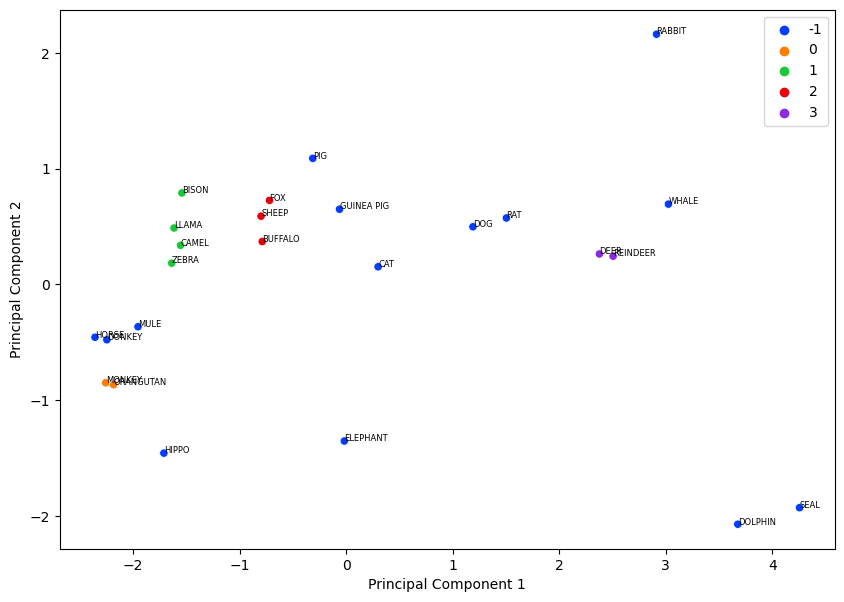

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], palette='bright',hue = clust_DB.labels_)
for i in np.arange(0,milk.shape[0]):
    plt.text(pca_result[i,0],pca_result[i,1],list(milk.index)[i],fontsize=6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()